In [1]:
import pandas as pd

In [2]:
df1 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df2 = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

#### Read the data for January. How many columns are there?

In [3]:
len(df1.columns)

19

#### Compute the duration variable. It should contain the duration of a ride in minutes.  
#### What's the standard deviation of the trips duration in January?

In [4]:
df1.head(1)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.0,0.5,0.0,0.0,1.0,14.3,2.5,0.0


In [5]:
df1['duration'] = df1.tpep_dropoff_datetime - df1.tpep_pickup_datetime
df1[['duration']].head(1)

,duration
0,0 days 00:08:26


In [6]:
df1['duration'] = df1.duration.apply(lambda td: td.total_seconds() / 60)
df1.duration.describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

#### Check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).
#### What fraction of the records left after you dropped the outliers?

In [7]:
pre = len(df1)
df1 = df1[(df1.duration >= 1) & (df1.duration <= 60)]
post = len(df1)

In [8]:
f'fraction {post/pre*100:.2f}'

'fraction 98.12'

#### Apply one-hot encoding to the pickup and dropoff location IDs.  
#### What's the dimensionality of this matrix (number of columns)?

In [9]:
categorical = ['PULocationID', 'DOLocationID']
df1[categorical] = df1[categorical].astype(str)
train_dicts = df1[categorical].to_dict(orient='records')
train_dicts[0]

{'PULocationID': '161', 'DOLocationID': '141'}

In [10]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6018346 stored elements and shape (3009173, 515)>

#### Use the feature matrix from the previous step to train a model.  
* Train a plain linear regression model with default parameters, where duration is the response variable
* Calculate the RMSE of the model on the training data

#### What's the RMSE on train?

In [11]:
y_train = df1['duration']

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_train_hat = lr.predict(X_train)

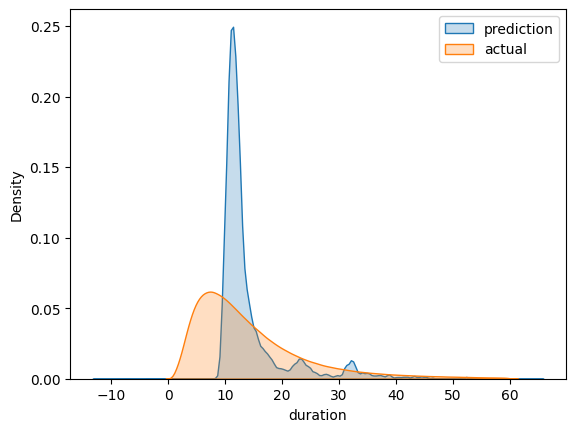

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.kdeplot(y_train_hat, label='prediction', fill=True)
sns.kdeplot(y_train, label='actual', fill=True)
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_train, y_train_hat)

np.float64(7.649261932106969)

#### Apply this model to the validation dataset (February 2023).
#### What's the RMSE on validation?

In [16]:
df2['duration'] = df2.tpep_dropoff_datetime - df2.tpep_pickup_datetime
df2.duration = df2.duration.apply(lambda td: td.total_seconds() / 60)
df2 = df2[(df2.duration >= 1) & (df2.duration <= 60)]
df2[categorical] = df2[categorical].astype(str)
val_dicts = df2[categorical].to_dict(orient='records')

In [17]:
X_val = dv.transform(val_dicts)
X_val

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5711894 stored elements and shape (2855951, 515)>

In [18]:
y_val = df2['duration']

In [19]:
y_val_hat = lr.predict(X_val)

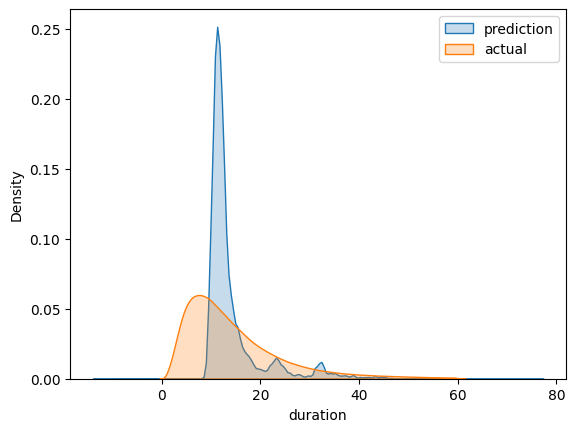

In [20]:
plt.figure()
sns.kdeplot(y_val_hat, label='prediction', fill=True)
sns.kdeplot(y_val, label='actual', fill=True)
plt.legend()
plt.show()

In [21]:
root_mean_squared_error(y_val, y_val_hat)

np.float64(7.811818743246608)